In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras
import tensorflow_datasets as tfds

import pathlib
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import cv2
import os

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Viewing the data in the folder present from the drive
!ls "/content/drive/My Drive/input"

path_train = "/content/drive/My Drive/input/train/"
path_test = "/content/drive/My Drive/input/test/"
# path_devkit = "/content/drive/My Drive/input/devkit"

from pathlib import Path
from matplotlib.patches import Rectangle
from scipy.io import loadmat

cars_meta = loadmat('/content/drive/My Drive/input/devkit/cars_meta.mat')
cars_train_annos = loadmat('/content/drive/My Drive/input/devkit/cars_train_annos.mat')
cars_test_annos = loadmat('/content/drive/My Drive/input/devkit/cars_test_annos_withlabels.mat')

Mounted at /content/drive
'?นิรสำืำะ1.h5'	  devkit	  Model5_Mobilenet.h5   test
 cars_test.tgz	  Mobilenet1.h5   Model6.h5	        train
 cars_train.tgz   Mobilenet2.h5   resnet50.h5	        Xception.h5


In [ ]:
# print(cars_meta) #'class_names'
cars_classes = [i for i in cars_meta['class_names'][0]]

df = pd.DataFrame(cars_classes,  columns =['Type'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


,Type
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [ ]:
df.Type.unique()


array(['AM General Hummer SUV 2000', 'Acura RL Sedan 2012',
       'Acura TL Sedan 2012', 'Acura TL Type-S 2008',
       'Acura TSX Sedan 2012', 'Acura Integra Type R 2001',
       'Acura ZDX Hatchback 2012',
       'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008',
       'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012',
       'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994',
       'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011',
       'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012',
       'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007',
       'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012',
       'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012',
       'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012',
       'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007',
       'BMW X

In [ ]:
#Splitting company name from CarName column
car_newclasses = df['Type'].apply(lambda x : x.split(' ')[0])
df.insert(0,"Brand", car_newclasses)

df.Brand.unique()

array(['AM', 'Acura', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge',
       'Eagle', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo',
       'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar',
       'Jeep', 'Lamborghini', 'Land', 'Lincoln', 'MINI', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Nissan',
       'Plymouth', 'Porsche', 'Ram', 'Rolls-Royce', 'Scion', 'Spyker',
       'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart'],
      dtype=object)

In [ ]:
df.head()

,Brand,Type
0,AM,AM General Hummer SUV 2000
1,Acura,Acura RL Sedan 2012
2,Acura,Acura TL Sedan 2012
3,Acura,Acura TL Type-S 2008
4,Acura,Acura TSX Sedan 2012


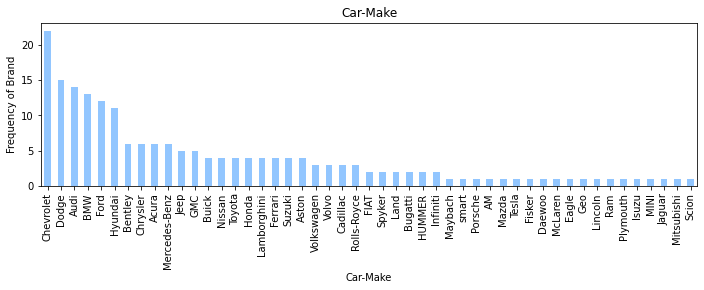

In [ ]:
plt.figure(figsize=(40, 3))
plt.style.use("seaborn-pastel")

plt.subplot(1,3,1)
plt1 = df.Brand.value_counts().plot(kind='bar')
plt.title('Car-Make')
plt1.set(xlabel = 'Car-Make', ylabel='Frequency of Brand')


plt.show()

In [ ]:
labels = df.Brand #(196, )

print(np.array(labels).shape)

(196,)


In [ ]:
print(cars_train_annos)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013', '__version__': '1.0', '__globals__': [], 'annotations': array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
        ...,
        (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
        (array([[78]], dtype=uint8), array([[526]], dtype=uint16), array([[

In [ ]:

datarow_train = [[i.flat[0] for i in line] for line in cars_train_annos['annotations'][0]]
columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'classes', 'fname']
df_train = pd.DataFrame(datarow_train, columns=columns)
df_train['classes'] = df_train['classes']-1 # Python indexing starts on zero.
df_train['fname'] = [f for f in df_train['fname']] #  Appending Path
df_train.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,classes,fname
0,39,116,569,375,13,00001.jpg
1,36,116,868,587,2,00002.jpg
2,85,109,601,381,90,00003.jpg
3,621,393,1484,1096,133,00004.jpg
4,14,36,133,99,105,00005.jpg


In [ ]:
df_train = df_train.merge(labels, left_on='classes', right_index=True, how='left')
df_train = df_train.sort_index()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bbox_x1  8144 non-null   int64 
 1   bbox_y1  8144 non-null   int64 
 2   bbox_x2  8144 non-null   int64 
 3   bbox_y2  8144 non-null   int64 
 4   classes  8144 non-null   int64 
 5   fname    8144 non-null   object
 6   Brand    8144 non-null   object
dtypes: int64(5), object(2)
memory usage: 445.5+ KB


In [ ]:
print(datarow_train[0])

[39, 116, 569, 375, 14, '00001.jpg']


In [ ]:
datarow_test = [[i.flat[0] for i in line] for line in cars_test_annos['annotations'][0]]

columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2','classes', 'fname']
df_test = pd.DataFrame(datarow_test, columns=columns)
df_test['classes'] = df_test['classes']-1 # Python indexing starts on zero.
df_test['fname'] = [f for f in df_test['fname']] #  Appending Path
df_test.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,classes,fname
0,30,52,246,147,180,00001.jpg
1,100,19,576,203,102,00002.jpg
2,51,105,968,659,144,00003.jpg
3,67,84,581,407,186,00004.jpg
4,140,151,593,339,184,00005.jpg


In [ ]:
df_test = df_test.merge(labels, left_on='classes', right_index=True, how='left')
df_test = df_test.sort_index()
df_test.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,classes,fname,Brand
0,30,52,246,147,180,00001.jpg,Suzuki
1,100,19,576,203,102,00002.jpg,Ferrari
2,51,105,968,659,144,00003.jpg,Jeep
3,67,84,581,407,186,00004.jpg,Toyota
4,140,151,593,339,184,00005.jpg,Tesla


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bbox_x1  8041 non-null   int64 
 1   bbox_y1  8041 non-null   int64 
 2   bbox_x2  8041 non-null   int64 
 3   bbox_y2  8041 non-null   int64 
 4   classes  8041 non-null   int64 
 5   fname    8041 non-null   object
 6   Brand    8041 non-null   object
dtypes: int64(5), object(2)
memory usage: 439.9+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bbox_x1  8144 non-null   int64 
 1   bbox_y1  8144 non-null   int64 
 2   bbox_x2  8144 non-null   int64 
 3   bbox_y2  8144 non-null   int64 
 4   classes  8144 non-null   int64 
 5   fname    8144 non-null   object
 6   Brand    8144 non-null   object
dtypes: int64(5), object(2)
memory usage: 445.5+ KB


[Text(0, 0.5, 'Frequency of Car-make in Training set'),
 Text(0.5, 0, 'Car-Make')]

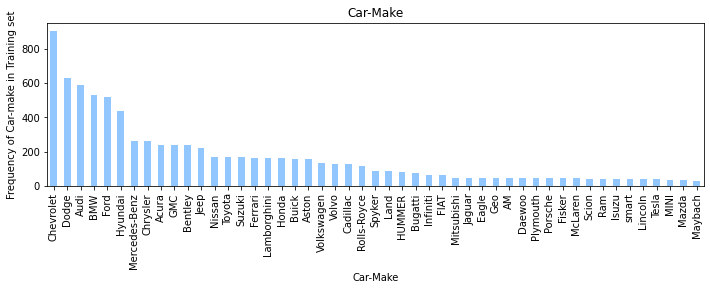

In [ ]:
plt.figure(figsize=(40, 3))
plt.style.use("seaborn-pastel")

plt.subplot(1,3,1)
plt1 = df_train.Brand.value_counts().plot(kind='bar')
plt.title('Car-Make')
plt1.set(xlabel = 'Car-Make', ylabel='Frequency of Car-make in Training set')


In [ ]:
col_fname = df_train['fname'].values
# col_brand = df_train['Brand'].values

print(path_train + col_fname[0])  

/content/drive/My Drive/input/train/00001.jpg


In [ ]:
list_ds = tf.data.Dataset.list_files(str(pathlib.Path(path_train+'*.jpg')), shuffle=False)

# for f in list_ds:
#   print(f.numpy())

print(list_ds)


<TensorSliceDataset shapes: (), types: tf.string>


In [ ]:

## PATH : Path to directory containing images
def process_path(path) :
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [224,224], preserve_aspect_ratio=False, antialias=False, name=None)
  image /= 255
  return image
    # train_label = df_train.classes[idx.numpy()]


indices_tr = df_train.classes.values

lbs_train = tf.one_hot(indices_tr, 196,
           on_value=1.0, off_value=0.0,
           axis=-1)


Y_train = tf.data.Dataset.from_tensor_slices(lbs_train).batch(64)
X_train = list_ds.map(process_path).batch(64)
train_ds = tf.data.Dataset.zip((X_train, Y_train))


list_test = tf.data.Dataset.list_files(str(pathlib.Path(path_test+'*.jpg')), shuffle=False)


indices_te = df_test.classes.values

lbs_test = tf.one_hot(indices_te, 196,
           on_value=1.0, off_value=0.0,
           axis=-1)

Y_test = tf.data.Dataset.from_tensor_slices(lbs_test).batch(64)
X_test = list_test.map(process_path).batch(64)
test_ds = tf.data.Dataset.zip((X_test, Y_test))

print(len(X_train), X_train)
print(Y_train)
print(len(X_test), X_test)
print(Y_test)
print("train_ds: ", train_ds, "test_ds: ", test_ds)
print("len train_ds: ", len(train_ds), "len test_ds: ", len(test_ds))

128 <BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>
<BatchDataset shapes: (None, 196), types: tf.float32>
126 <BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>
<BatchDataset shapes: (None, 196), types: tf.float32>
train_ds:  <ZipDataset shapes: ((None, 224, 224, 3), (None, 196)), types: (tf.float32, tf.float32)> test_ds:  <ZipDataset shapes: ((None, 224, 224, 3), (None, 196)), types: (tf.float32, tf.float32)>
len train_ds:  128 len test_ds:  126


In [ ]:
num_classes = labels.shape[0]
print(num_classes)

196


In [ ]:
from keras.callbacks import ModelCheckpoint
best_model = ModelCheckpoint('/content/drive/MyDrive/Callback',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_acc',
    restore_best_weights=True,
    verbose=1
)

In [ ]:
from keras.callbacks import ModelCheckpoint
# autosave best Model
best_model_file = "resnet50.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose=1, save_best_only=True)


In [ ]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet',  input_shape=(224,224,3)))
model.add(Dense(num_classes, activation='softmax'))


model.layers[0].trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 196)               401604    
Total params: 23,989,316
Trainable params: 401,604
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model_history = model.fit(train_ds, epochs=10, callbacks=[early_stopping_callback])



Epoch 1/10
128/128 [==============================] - 2442s 19s/step - loss: 6.3802 - accuracy: 0.0072
Epoch 2/10
128/128 [==============================] - 44s 343ms/step - loss: 5.9353 - accuracy: 0.0165
Epoch 3/10
128/128 [==============================] - 43s 335ms/step - loss: 5.7915 - accuracy: 0.0237
Epoch 4/10
128/128 [==============================] - 43s 334ms/step - loss: 5.6718 - accuracy: 0.0303
Epoch 5/10
128/128 [==============================] - 43s 332ms/step - loss: 5.5677 - accuracy: 0.0371
Epoch 6/10
128/128 [==============================] - 42s 329ms/step - loss: 5.4740 - accuracy: 0.0422
Epoch 7/10
128/128 [==============================] - 43s 333ms/step - loss: 5.3880 - accuracy: 0.0522
Epoch 8/10
128/128 [==============================] - 43s 335ms/step - loss: 5.3087 - accuracy: 0.0583
Epoch 9/10
128/128 [==============================] - 43s 339ms/step - loss: 5.2350 - accuracy: 0.0641
Epoch 10/10
128/128 [==============================] - 44s 340ms/step - l

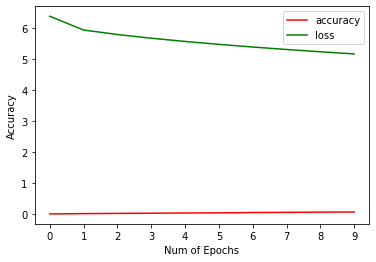

In [ ]:
plt.figure(0)
plt.plot(model_history.history['accuracy'],'r')
plt.plot(model_history.history['loss'],'g')
plt.xticks(np.arange(0, 10, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.legend(['accuracy','loss'])
  
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/input/resnet50.h5", save_format="h5")

# from tensorflow import keras
# load_model = keras.models.load_model('/content/drive/MyDrive/input/resnet50.h5')

In [ ]:
base_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                   input_shape=(224, 224, 3),
                                                   weights='imagenet')
base_output = base_model.layers[-2]
outputs = tf.keras.layers.Dense(num_classes,
                                    activation='softmax')(base_output.output)

model2 = tf.keras.models.Model(inputs=base_model.inputs,
                                  outputs=outputs)


In [ ]:

model2.summary()


Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])

model_history2 = model2.fit(train_ds, epochs=10)

Epoch 1/10
128/128 [==============================] - 51s 402ms/step - loss: 0.9987 - accuracy: 0.7243
Epoch 2/10
128/128 [==============================] - 53s 417ms/step - loss: 0.3080 - accuracy: 0.9052
Epoch 3/10
128/128 [==============================] - 54s 423ms/step - loss: 0.1344 - accuracy: 0.9585
Epoch 4/10
128/128 [==============================] - 54s 423ms/step - loss: 0.1076 - accuracy: 0.9711
Epoch 5/10
128/128 [==============================] - 54s 421ms/step - loss: 0.1262 - accuracy: 0.9614
Epoch 6/10
128/128 [==============================] - 54s 423ms/step - loss: 0.1609 - accuracy: 0.9493
Epoch 7/10
128/128 [==============================] - 54s 423ms/step - loss: 0.1670 - accuracy: 0.9468
Epoch 8/10
128/128 [==============================] - 54s 418ms/step - loss: 0.1283 - accuracy: 0.9594
Epoch 9/10
128/128 [==============================] - 53s 418ms/step - loss: 0.0839 - accuracy: 0.9774
Epoch 10/10
128/128 [==============================] - 54s 418ms/step - l

In [ ]:
model2.evaluate(test_ds)

126/126 [==============================] - 42s 330ms/step - loss: 10.8327 - accuracy: 0.1009


[10.832669258117676, 0.10085809975862503]

In [ ]:
model2.predict(test_ds)

array([[4.4328061e-19, 5.0746878e-09, 1.7286086e-13, ..., 1.8980985e-14,
        4.2221469e-08, 1.9948945e-09],
       [7.0543730e-14, 2.1813898e-11, 6.8776208e-13, ..., 5.8990949e-15,
        8.6586550e-11, 1.1642755e-04],
       [5.3836194e-14, 2.7175156e-13, 7.3290664e-17, ..., 9.9683692e-11,
        2.5542484e-05, 1.5048517e-08],
       ...,
       [4.6577434e-12, 2.0381356e-11, 1.1254772e-15, ..., 4.2218326e-10,
        1.0266548e-03, 5.7145564e-07],
       [9.5614172e-15, 1.2150051e-14, 1.6938601e-18, ..., 1.0436706e-14,
        2.6449890e-16, 6.1994548e-10],
       [9.5227699e-14, 1.9620741e-11, 3.5506261e-16, ..., 9.0419181e-13,
        1.8538311e-06, 1.0697540e-08]], dtype=float32)

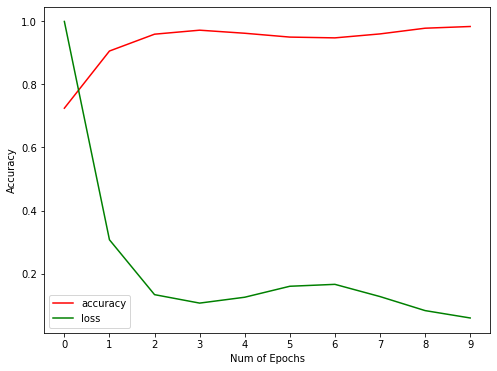

In [ ]:
plt.figure(0)
plt.plot(model_history2.history['accuracy'],'r')
plt.plot(model_history2.history['loss'],'g')
plt.xticks(np.arange(0, 10, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.legend(['accuracy','loss'])
  
plt.show()

In [ ]:
# model3.save("/content/drive/MyDrive/input/Mobilenet2.h5", save_format="h5")

# # from tensorflow import keras
resnet_load = keras.models.load_model('/content/drive/MyDrive/input/resnet50.h5')

In [ ]:
resnet_load.evaluate(test_ds)


126/126 [==============================] - 42s 331ms/step - loss: 5.9028 - accuracy: 0.0286


[5.902781009674072, 0.028603406623005867]

In [ ]:
x, y = next(test_ds.as_numpy_iterator())
pred = model2.predict(test_ds.take(1))
classes = [df_test.Brand[i] for i in np.argmax(y, axis=1)]
y_pred = [df_test.Brand[i] for i in np.argmax(pred, axis=1)]
print(y_pred)
print(classes)

print(len(classes))
print(len(y_pred))



['BMW', 'Dodge', 'Chrysler', 'BMW', 'BMW', 'BMW', 'BMW', 'Audi', 'BMW', 'BMW', 'GMC', 'BMW', 'GMC', 'BMW', 'BMW', 'GMC', 'Audi', 'BMW', 'BMW', 'BMW', 'GMC', 'Audi', 'GMC', 'GMC', 'BMW', 'Chrysler', 'Audi', 'Acura', 'GMC', 'BMW', 'BMW', 'BMW', 'BMW', 'GMC', 'BMW', 'GMC', 'Chevrolet', 'BMW', 'BMW', 'GMC', 'GMC', 'GMC', 'BMW', 'Buick', 'Chrysler', 'BMW', 'GMC', 'GMC', 'GMC', 'Chevrolet', 'BMW', 'BMW', 'Chrysler', 'Audi', 'Chrysler', 'GMC', 'GMC', 'Audi', 'BMW', 'GMC', 'Chevrolet', 'Chevrolet', 'BMW', 'BMW']
['BMW', 'BMW', 'Cadillac', 'Chrysler', 'Hyundai', 'Chevrolet', 'Chevrolet', 'Spyker', 'Jeep', 'BMW', 'Audi', 'Hyundai', 'Land', 'BMW', 'Fisker', 'Hyundai', 'Mazda', 'Toyota', 'Acura', 'Jeep', 'Chrysler', 'Toyota', 'Ram', 'BMW', 'Spyker', 'Chrysler', 'Dodge', 'Audi', 'Cadillac', 'Tesla', 'Eagle', 'BMW', 'Mercedes-Benz', 'Chevrolet', 'Toyota', 'GMC', 'Mercedes-Benz', 'Hyundai', 'Acura', 'Aston', 'Geo', 'Isuzu', 'Jeep', 'Chevrolet', 'Chrysler', 'BMW', 'Nissan', 'Acura', 'Mercedes-Benz', '

In [ ]:
model2.save("/content/drive/MyDrive/input/Mobilenet1.h5", save_format="h5")

# from tensorflow import keras
# load_model = keras.models.load_model('/content/drive/MyDrive/input/resnet50.h5')

In [ ]:
model3 = Sequential()

model3.add(tf.keras.applications.MobileNetV2(pooling='avg', weights='imagenet'))
model3.add(BatchNormalization())
model3.add(Dense(num_classes, activation='softmax'))


In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])

model_history3 = model3.fit(train_ds, epochs=10)

Epoch 1/10
128/128 [==============================] - 52s 406ms/step - loss: 4.9676 - accuracy: 0.0398
Epoch 2/10
128/128 [==============================] - 51s 402ms/step - loss: 3.8695 - accuracy: 0.1582
Epoch 3/10
128/128 [==============================] - 52s 407ms/step - loss: 2.8964 - accuracy: 0.3008
Epoch 4/10
128/128 [==============================] - 52s 402ms/step - loss: 2.2281 - accuracy: 0.4403
Epoch 5/10
128/128 [==============================] - 51s 402ms/step - loss: 1.6908 - accuracy: 0.5664
Epoch 6/10
128/128 [==============================] - 51s 398ms/step - loss: 1.2998 - accuracy: 0.6655
Epoch 7/10
128/128 [==============================] - 52s 402ms/step - loss: 1.0191 - accuracy: 0.7353
Epoch 8/10
128/128 [==============================] - 52s 408ms/step - loss: 0.7750 - accuracy: 0.8057
Epoch 9/10
128/128 [==============================] - 51s 401ms/step - loss: 0.5848 - accuracy: 0.8531
Epoch 10/10
128/128 [==============================] - 52s 404ms/step - l

In [ ]:

# model3.save("/content/drive/MyDrive/input/Mobilenet2.h5", save_format="h5")

# from tensorflow import keras
Mobilenet2_loadmodel = keras.models.load_model('/content/drive/MyDrive/input/Mobilenet2.h5')

In [ ]:
Mobilenet2_loadmodel.evaluate(test_ds)

126/126 [==============================] - 41s 329ms/step - loss: 7.6542 - accuracy: 0.0298


[7.654150009155273, 0.029847033321857452]

In [ ]:
model4 = Sequential()

model4.add(tf.keras.applications.Xception(pooling='avg', weights='imagenet'))
model4.add(BatchNormalization())
model4.add(Dense(num_classes*2, activation='softmax'))
model4.add(Dense(num_classes, activation='softmax'))


91889664/91884032 [==============================] - 1s 0us/step


In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])

model_history4 = model4.fit(train_ds, epochs=10)

Epoch 1/10
128/128 [==============================] - 160s 1s/step - loss: 5.2773 - accuracy: 0.0066
Epoch 2/10
128/128 [==============================] - 158s 1s/step - loss: 5.2217 - accuracy: 0.0138
Epoch 3/10
128/128 [==============================] - 157s 1s/step - loss: 5.1631 - accuracy: 0.0168
Epoch 4/10
128/128 [==============================] - 158s 1s/step - loss: 5.1264 - accuracy: 0.0190
Epoch 5/10
128/128 [==============================] - 157s 1s/step - loss: 5.0781 - accuracy: 0.0198
Epoch 6/10
128/128 [==============================] - 158s 1s/step - loss: 5.0386 - accuracy: 0.0217
Epoch 7/10
128/128 [==============================] - 157s 1s/step - loss: 5.0008 - accuracy: 0.0219
Epoch 8/10
128/128 [==============================] - 158s 1s/step - loss: 4.9765 - accuracy: 0.0214
Epoch 9/10
128/128 [==============================] - 157s 1s/step - loss: 4.9364 - accuracy: 0.0220
Epoch 10/10
128/128 [==============================] - 157s 1s/step - loss: 4.9085 - accura

In [ ]:
model4.evaluate(test_ds)

model4.save("/content/drive/MyDrive/input/Xception.h5", save_format="h5")

# from tensorflow import keras
# load_model = keras.models.load_model('/content/drive/MyDrive/input/resnet50.h5')

126/126 [==============================] - 42s 332ms/step - loss: 4.9770 - accuracy: 0.0205


In [ ]:
#Model 2 has the best Acc but Overfit

#Split to train 80% Val 20%

train_img = tf.data.Dataset.from_tensor_slices(lbs_train)
train_ls = list_ds.map(process_path)


train_size = int(0.8 * len(train_img))
val_size = int(0.2 * len(train_img))

train_dataset = list_ds.take(train_size) #train 80 only path
val_dataset = list_ds.skip(train_size) #val 20 only path

train_lb = train_img.take(train_size) #lb train 80 one hot
val_lb = train_img.skip(train_size)  #lb train 20 one hot

#80


X_train_split = train_dataset.map(process_path).batch(64)
valX_split = train_lb.batch(64)

train_ds_split = tf.data.Dataset.zip((X_train_split, valX_split)) #80 zip

#20

Y_train_split = val_dataset.map(process_path).batch(64)
valY_split = val_lb.batch(64)

val_ds_split = tf.data.Dataset.zip((Y_train_split, valY_split)) #20 zip


In [ ]:
base_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                   input_shape=(224, 224, 3),
                                                   weights='imagenet')
_model5 = base_model.layers[-2].output


_model5 = Flatten()(_model5)
_model5 = Dense(1024 , activation='relu')(_model5)
_model5 = Dropout(0.5)(_model5)
_model5 = Dense(512 , activation='relu')(_model5)
_model5 = Dropout(0.5)(_model5)
_model5 = Dense(num_classes, activation='softmax')(_model5)

model5 = keras.Model(inputs=base_model.input, outputs=_model5)


In [ ]:
model5.summary()


Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_24[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
model5.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])

model_history5 = model5.fit(train_ds_split, validation_data=val_ds_split, 
                            epochs=10, verbose=1, callbacks=[early_stopping_callback])



Epoch 1/10
102/102 [==============================] - 54s 526ms/step - loss: 5.2932 - accuracy: 0.0089 - val_loss: 6.3766 - val_accuracy: 0.0031
Epoch 2/10
102/102 [==============================] - 49s 480ms/step - loss: 5.1612 - accuracy: 0.0097 - val_loss: 5.6065 - val_accuracy: 0.0080
Epoch 3/10
102/102 [==============================] - 48s 469ms/step - loss: 4.9551 - accuracy: 0.0157 - val_loss: 7.7638 - val_accuracy: 0.0068
Epoch 4/10
102/102 [==============================] - 48s 469ms/step - loss: 4.6587 - accuracy: 0.0275 - val_loss: 10.0183 - val_accuracy: 0.0043
Epoch 5/10
102/102 [==============================] - 48s 471ms/step - loss: 4.3804 - accuracy: 0.0391 - val_loss: 5.3262 - val_accuracy: 0.0123
Epoch 6/10
102/102 [==============================] - 48s 472ms/step - loss: 4.1012 - accuracy: 0.0522 - val_loss: 8.3552 - val_accuracy: 0.0049
Epoch 7/10
102/102 [==============================] - 49s 476ms/step - loss: 3.9268 - accuracy: 0.0688 - val_loss: 13.3191 - val_

In [ ]:
model5.evaluate(test_ds)

126/126 [==============================] - 38s 301ms/step - loss: 6.7334 - accuracy: 0.0234


[6.733364582061768, 0.023380177095532417]

In [ ]:
#increase EPOCH

model_history5 = model5.fit(train_ds_split, validation_data=val_ds_split, 
                            epochs=100, verbose=1)



Epoch 1/100
102/102 [==============================] - 48s 474ms/step - loss: 2.1819 - accuracy: 0.3332 - val_loss: 10.2524 - val_accuracy: 0.0227
Epoch 2/100
102/102 [==============================] - 47s 465ms/step - loss: 1.9711 - accuracy: 0.3741 - val_loss: 8.1947 - val_accuracy: 0.0393
Epoch 3/100
102/102 [==============================] - 50s 485ms/step - loss: 1.8216 - accuracy: 0.4177 - val_loss: 9.2073 - val_accuracy: 0.0295
Epoch 4/100
102/102 [==============================] - 48s 470ms/step - loss: 1.6887 - accuracy: 0.4497 - val_loss: 10.2367 - val_accuracy: 0.0374
Epoch 5/100
102/102 [==============================] - 47s 465ms/step - loss: 1.6474 - accuracy: 0.4646 - val_loss: 8.0631 - val_accuracy: 0.0540
Epoch 6/100
102/102 [==============================] - 48s 474ms/step - loss: 1.5533 - accuracy: 0.4990 - val_loss: 9.6946 - val_accuracy: 0.0411
Epoch 7/100
102/102 [==============================] - 48s 473ms/step - loss: 1.4040 - accuracy: 0.5414 - val_loss: 9.3404

In [ ]:
model5.evaluate(test_ds)


126/126 [==============================] - 39s 312ms/step - loss: 5.0591 - accuracy: 0.4018


[5.059120178222656, 0.4018156826496124]

In [ ]:
model5.predict(test_ds)

array([[2.5189945e-19, 8.0063230e-12, 1.0421762e-18, ..., 2.9176296e-19,
        5.2579382e-13, 4.6220921e-14],
       [5.1321986e-04, 1.4978117e-07, 2.0912612e-09, ..., 1.5462117e-06,
        3.5974350e-09, 5.5304945e-06],
       [2.0215755e-22, 1.8471000e-31, 9.1447848e-32, ..., 2.1369068e-12,
        6.3509473e-20, 5.2376599e-26],
       ...,
       [3.5563263e-15, 2.3783393e-17, 9.0452887e-18, ..., 1.0846513e-04,
        6.3295361e-06, 6.3505753e-18],
       [1.0432233e-16, 1.3564177e-22, 1.4752811e-26, ..., 1.7122738e-22,
        1.1933555e-29, 8.0598338e-25],
       [3.7887688e-16, 1.4797284e-14, 4.6323753e-20, ..., 1.1435212e-11,
        3.6023870e-10, 4.5974674e-12]], dtype=float32)

In [ ]:
model_history5.history.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

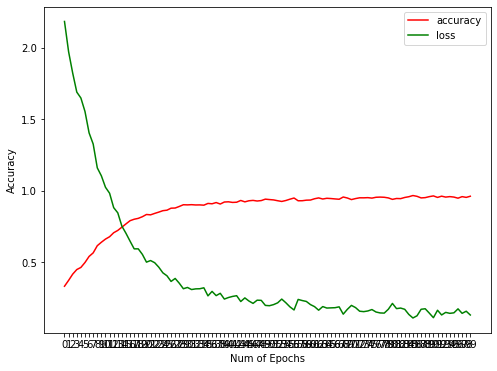

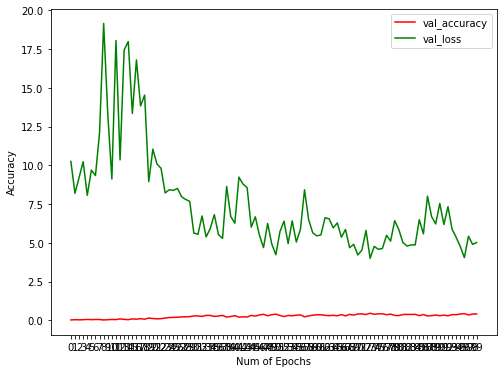

In [ ]:
plt.figure(0)
plt.plot(model_history5.history['accuracy'],'r')
plt.plot(model_history5.history['loss'],'g')
plt.xticks(np.arange(0, 100, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.legend(['accuracy','loss'])


plt.figure(1)
plt.plot(model_history5.history['val_accuracy'],'r')
plt.plot(model_history5.history['val_loss'],'g')
plt.xticks(np.arange(0, 100, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val_accuracy','val_loss'])
  
plt.show()



In [ ]:
# model5.save("/content/drive/MyDrive/input/Model5_Mobilenet.h5", save_format="h5")

# # # from tensorflow import keras
model5_load = keras.models.load_model('/content/drive/MyDrive/input/Model5_Mobilenet.h5')

In [ ]:
base_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                   input_shape=(224, 224, 3),
                                                   weights='imagenet')
_model6 = base_model.layers[-2].output


_model6 = BatchNormalization()(_model6)
_model6 = Dense(1024 , activation='relu')(_model6)
_model6 = Dropout(0.5)(_model6)
_model6 = Dense(512 , activation='relu')(_model6)
_model6 = Dropout(0.5)(_model6)
_model6 = Dense(num_classes, activation='softmax')(_model6)

model6 = keras.Model(inputs=base_model.input, outputs=_model6)


In [ ]:
model6.summary()


Model: "functional_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_38[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
model6.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])

model_history6 = model6.fit(train_ds_split, validation_data=val_ds_split, 
                            epochs=100, verbose=1)



Epoch 1/100
102/102 [==============================] - 52s 512ms/step - loss: 2.3791 - accuracy: 0.3150 - val_loss: 23.3499 - val_accuracy: 0.0080
Epoch 2/100
102/102 [==============================] - 50s 491ms/step - loss: 2.2032 - accuracy: 0.3546 - val_loss: 20.7468 - val_accuracy: 0.0074
Epoch 3/100
102/102 [==============================] - 50s 490ms/step - loss: 1.9533 - accuracy: 0.4164 - val_loss: 20.0784 - val_accuracy: 0.0086
Epoch 4/100
102/102 [==============================] - 50s 490ms/step - loss: 1.7831 - accuracy: 0.4589 - val_loss: 11.2569 - val_accuracy: 0.0098
Epoch 5/100
102/102 [==============================] - 49s 485ms/step - loss: 1.6607 - accuracy: 0.5010 - val_loss: 23.3406 - val_accuracy: 0.0184
Epoch 6/100
102/102 [==============================] - 50s 491ms/step - loss: 1.6386 - accuracy: 0.4993 - val_loss: 24.3803 - val_accuracy: 0.0190
Epoch 7/100
102/102 [==============================] - 50s 491ms/step - loss: 1.4120 - accuracy: 0.5592 - val_loss: 8.

In [ ]:
model6.evaluate(test_ds)

126/126 [==============================] - 47s 371ms/step - loss: 8.1268 - accuracy: 0.3271


[8.126769065856934, 0.32707375288009644]

In [ ]:
model6.save("/content/drive/MyDrive/input/Model6.h5", save_format="h5")

# from tensorflow import keras
# load_model = keras.models.load_model('/content/drive/MyDrive/input/resnet50.h5')

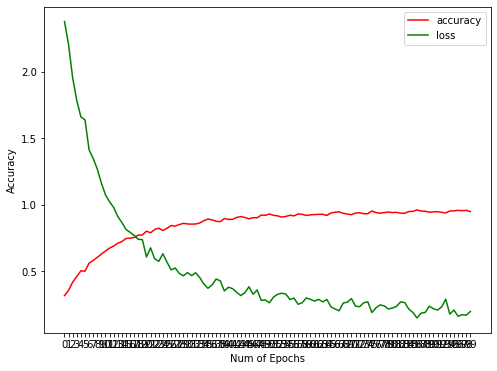

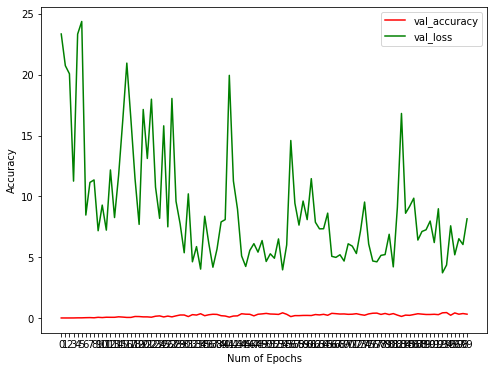

In [ ]:
plt.figure(0)
plt.plot(model_history6.history['accuracy'],'r')
plt.plot(model_history6.history['loss'],'g')
plt.xticks(np.arange(0, 100, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.legend(['accuracy','loss'])


plt.figure(1)
plt.plot(model_history6.history['val_accuracy'],'r')
plt.plot(model_history6.history['val_loss'],'g')
plt.xticks(np.arange(0, 100, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val_accuracy','val_loss'])
  
plt.show()



In [ ]:
base_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                   input_shape=(224, 224, 3),
                                                   weights='imagenet')
_model7 = base_model.layers[-2].output


_model7 = Flatten()(_model7)
_model7 = Dense(1024 , activation='relu')(_model7)
_model7 = Dropout(0.5)(_model7)
_model7 = Dense(512 , activation='relu')(_model7)
_model7 = Dropout(0.5)(_model7)
_model7 = Dense(num_classes, activation='softmax')(_model7)

model7 = keras.Model(inputs=base_model.input, outputs=_model7)


In [ ]:
model7.summary()


Model: "functional_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_39[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

model7.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=['accuracy'])

model_history7 = model7.fit(train_ds_split, validation_data=val_ds_split, 
                            epochs=100, verbose=1)



Epoch 1/100
102/102 [==============================] - 51s 501ms/step - loss: 5.8293 - accuracy: 0.0069 - val_loss: 5.2453 - val_accuracy: 0.0086
Epoch 2/100
102/102 [==============================] - 52s 507ms/step - loss: 5.1764 - accuracy: 0.0215 - val_loss: 5.1530 - val_accuracy: 0.0135
Epoch 3/100
102/102 [==============================] - 51s 496ms/step - loss: 4.8653 - accuracy: 0.0454 - val_loss: 4.9740 - val_accuracy: 0.0399
Epoch 4/100
102/102 [==============================] - 48s 475ms/step - loss: 4.5516 - accuracy: 0.0856 - val_loss: 4.7592 - val_accuracy: 0.0540
Epoch 5/100
102/102 [==============================] - 48s 474ms/step - loss: 4.1132 - accuracy: 0.1383 - val_loss: 4.4675 - val_accuracy: 0.0724
Epoch 6/100
102/102 [==============================] - 49s 479ms/step - loss: 3.6593 - accuracy: 0.2034 - val_loss: 4.1431 - val_accuracy: 0.1344
Epoch 7/100
102/102 [==============================] - 48s 471ms/step - loss: 3.1858 - accuracy: 0.2817 - val_loss: 3.8043 -

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

model7.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=['accuracy'])

model_history7 = model7.fit(train_ds_split, validation_data=val_ds_split, 
                            epochs=100, verbose=1)



Epoch 1/100
102/102 [==============================] - 51s 501ms/step - loss: 5.8293 - accuracy: 0.0069 - val_loss: 5.2453 - val_accuracy: 0.0086
Epoch 2/100
102/102 [==============================] - 52s 507ms/step - loss: 5.1764 - accuracy: 0.0215 - val_loss: 5.1530 - val_accuracy: 0.0135
Epoch 3/100
102/102 [==============================] - 51s 496ms/step - loss: 4.8653 - accuracy: 0.0454 - val_loss: 4.9740 - val_accuracy: 0.0399
Epoch 4/100
102/102 [==============================] - 48s 475ms/step - loss: 4.5516 - accuracy: 0.0856 - val_loss: 4.7592 - val_accuracy: 0.0540
Epoch 5/100
102/102 [==============================] - 48s 474ms/step - loss: 4.1132 - accuracy: 0.1383 - val_loss: 4.4675 - val_accuracy: 0.0724
Epoch 6/100
102/102 [==============================] - 49s 479ms/step - loss: 3.6593 - accuracy: 0.2034 - val_loss: 4.1431 - val_accuracy: 0.1344
Epoch 7/100
102/102 [==============================] - 48s 471ms/step - loss: 3.1858 - accuracy: 0.2817 - val_loss: 3.8043 -

In [ ]:
model7.save("/content/drive/MyDrive/input/Model7.h5", save_format="h5")

# from tensorflow import keras
# load_model = keras.models.load_model('/content/drive/MyDrive/input/resnet50.h5')

In [ ]:
base_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                   input_shape=(224, 224, 3),
                                                   weights='imagenet')
_model8 = base_model.layers[-2].output


_model8 = Flatten()(_model8)
_model8 = Dense(1024 , activation='relu')(_model8)
_model8 = Dropout(0.5)(_model8)
_model8 = Dense(512 , activation='relu')(_model8)
_model8 = Dropout(0.5)(_model8)
_model8 = Dense(num_classes, activation='softmax')(_model8)

model8 = keras.Model(inputs=base_model.input, outputs=_model8)


14540800/14536120 [==============================] - 0s 0us/step


In [ ]:
model8.summary()


Model: "functional_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_38[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.003)

model8.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=['accuracy'])

model_history8 = model8.fit(train_ds_split, validation_data=val_ds_split, 
                            epochs=100, verbose=1)



Epoch 1/100
102/102 [==============================] - 3074s 30s/step - loss: 5.3310 - accuracy: 0.0052 - val_loss: 28.6311 - val_accuracy: 0.0055
Epoch 2/100
102/102 [==============================] - 62s 606ms/step - loss: 5.2806 - accuracy: 0.0077 - val_loss: 5.8852 - val_accuracy: 0.0031
Epoch 3/100
102/102 [==============================] - 62s 605ms/step - loss: 5.2770 - accuracy: 0.0083 - val_loss: 5.2896 - val_accuracy: 0.0080
Epoch 4/100
102/102 [==============================] - 62s 611ms/step - loss: 5.2748 - accuracy: 0.0084 - val_loss: 5.2910 - val_accuracy: 0.0074
Epoch 5/100
102/102 [==============================] - 64s 623ms/step - loss: 5.2739 - accuracy: 0.0084 - val_loss: 5.2943 - val_accuracy: 0.0074
Epoch 6/100
102/102 [==============================] - 62s 608ms/step - loss: 5.2728 - accuracy: 0.0084 - val_loss: 5.2940 - val_accuracy: 0.0080
Epoch 7/100
102/102 [==============================] - 57s 558ms/step - loss: 5.2731 - accuracy: 0.0084 - val_loss: 5.3019 

In [ ]:
model8.save("/content/drive/MyDrive/input/Model8-2.h5", save_format="h5")

# from tensorflow import keras
# load_model = keras.models.load_model('/content/drive/MyDrive/input/resnet50.h5')

In [ ]:
x, y = next(test_ds.as_numpy_iterator())
pred = model5_load.predict(test_ds.take(1))
classes = [df_test.Brand[i] for i in np.argmax(y, axis=1)]
y_pred = [df_test.Brand[i] for i in np.argmax(pred, axis=1)]
print(y_pred)
print(classes)

['Hyundai', 'Audi', 'Cadillac', 'Chrysler', 'Honda', 'Chevrolet', 'Chevrolet', 'Aston', 'Jeep', 'BMW', 'Audi', 'BMW', 'Scion', 'BMW', 'Fisker', 'Hyundai', 'Mazda', 'Volkswagen', 'Toyota', 'Jeep', 'Ford', 'Jeep', 'Jeep', 'Chevrolet', 'Eagle', 'Chrysler', 'Dodge', 'Chevrolet', 'Jeep', 'Tesla', 'Eagle', 'Chevrolet', 'Chrysler', 'Chevrolet', 'Audi', 'GMC', 'BMW', 'Cadillac', 'Acura', 'Ford', 'Suzuki', 'Isuzu', 'Audi', 'Chevrolet', 'Chrysler', 'Chrysler', 'Bentley', 'Acura', 'Chrysler', 'Chevrolet', 'Acura', 'Dodge', 'Ford', 'Mercedes-Benz', 'BMW', 'BMW', 'Nissan', 'Bentley', 'Mercedes-Benz', 'Nissan', 'Toyota', 'Audi', 'McLaren', 'BMW']
['BMW', 'BMW', 'Cadillac', 'Chrysler', 'Hyundai', 'Chevrolet', 'Chevrolet', 'Spyker', 'Jeep', 'BMW', 'Audi', 'Hyundai', 'Land', 'BMW', 'Fisker', 'Hyundai', 'Mazda', 'Toyota', 'Acura', 'Jeep', 'Chrysler', 'Toyota', 'Ram', 'BMW', 'Spyker', 'Chrysler', 'Dodge', 'Audi', 'Cadillac', 'Tesla', 'Eagle', 'BMW', 'Mercedes-Benz', 'Chevrolet', 'Toyota', 'GMC', 'Mercede